<a href="https://colab.research.google.com/github/nahu9815/inteligencia_artificial/blob/main/Chest_Xray_InceptionV3%2050%20epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
from keras.preprocessing.image import ImageDataGenerator 
# https://keras.io/api/preprocessing/image/#image-data-preprocessing
from keras.applications.imagenet_utils import preprocess_input

from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

from keras.layers import Dense, Flatten

from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import accuracy

import matplotlib.pyplot as plt
#!pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
pathTrain = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/train/'
pathTest = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_GRUPO/chest_xray/test/'

if (os.path.exists(pathTrain) and os.path.exists(pathTest)):
    print('OK')
else:
    print('No existen carpetas')
    

OK


In [16]:
images_increased = 5
width_shape = 224
height_shape = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=20, # rota 20 grados
    zoom_range=0.2, # zoom
    width_shift_range=0.1, # desplazar 10%
    height_shift_range=0.1,  # desplazar 10%
    horizontal_flip=True, # invertir horizontalmente
    vertical_flip=False,
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    pathTrain,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(  
    pathTest,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
inputShape = (height_shape, width_shape, 3)

#model = VGG16(include_top=False, weights="imagenet", input_shape=inputShape)
#model.summary()
model = InceptionV3(include_top=False, weights="imagenet", input_shape=inputShape)
for layer in model.layers:
    layer.trainable = False
model.summary()
    
   

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [18]:
def load_fc_layers(model):
    
    # add new classifier layers
    flat = Flatten()(model.layers[-1].output)
    dense = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat)
    output = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=model.inputs, outputs=output)
    
    return model

In [19]:
fullModel = load_fc_layers(model)
fullModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [20]:
adam = Adam(learning_rate=0.001)

fullModel.compile(
    optimizer=adam,
    loss=binary_crossentropy,
    metrics=[accuracy]
)

In [21]:
epoch = 50

history = fullModel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epoch
)

Epoch 1/50
164/164 [==============================] - 142s 756ms/step - loss: 48.3020 - accuracy: 0.7047 - val_loss: 8.3359 - val_accuracy: 0.6426
Epoch 2/50
164/164 [==============================] - 118s 718ms/step - loss: 5.5222 - accuracy: 0.6958 - val_loss: 6.2067 - val_accuracy: 0.6090
Epoch 3/50
164/164 [==============================] - 118s 717ms/step - loss: 3.9329 - accuracy: 0.6947 - val_loss: 6.7343 - val_accuracy: 0.6122
Epoch 4/50
164/164 [==============================] - 118s 717ms/step - loss: 3.3286 - accuracy: 0.6961 - val_loss: 5.4955 - val_accuracy: 0.5897
Epoch 5/50
164/164 [==============================] - 118s 720ms/step - loss: 2.7677 - accuracy: 0.6369 - val_loss: 2.4500 - val_accuracy: 0.4712
Epoch 6/50
164/164 [==============================] - 117s 716ms/step - loss: 1.2666 - accuracy: 0.5860 - val_loss: 2.6294 - val_accuracy: 0.5369
Epoch 7/50
164/164 [==============================] - 117s 712ms/step - loss: 1.0448 - accuracy: 0.5716 - val_loss: 1.5798 

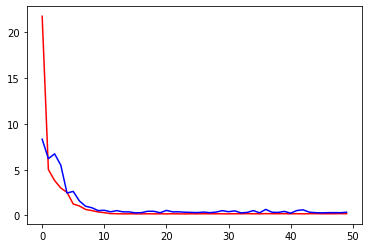

In [22]:
history.history
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='red')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='blue')

plt.show()